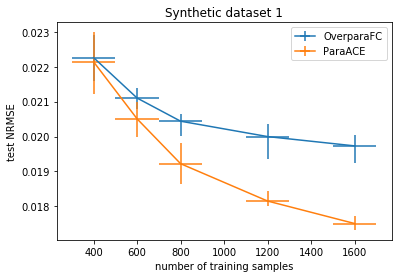

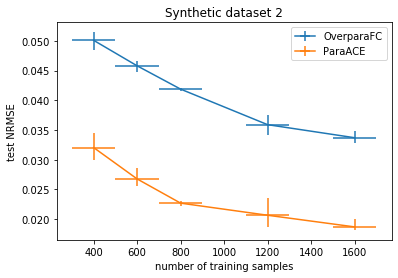

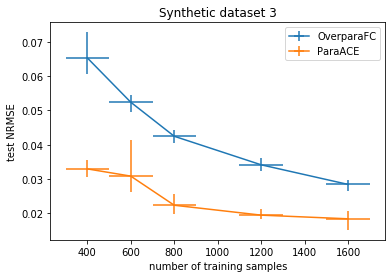

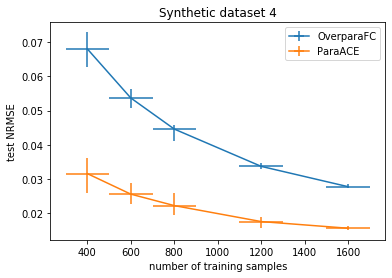

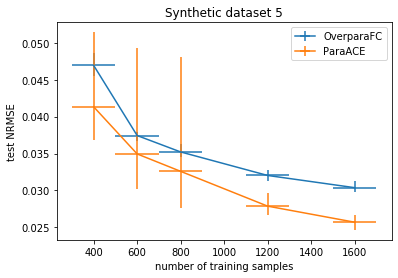

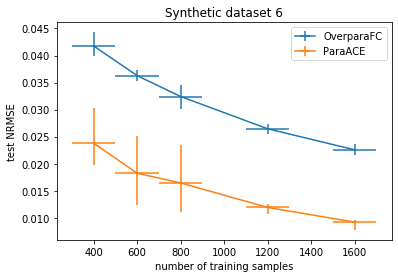

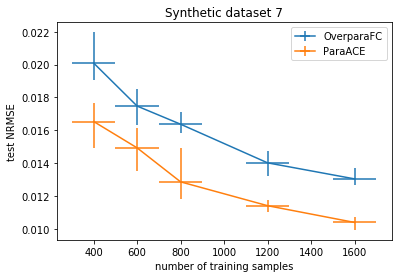

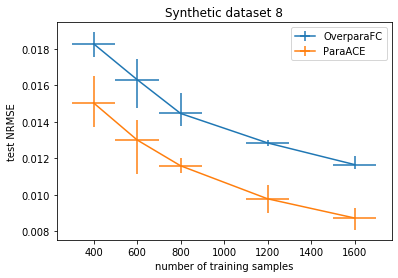

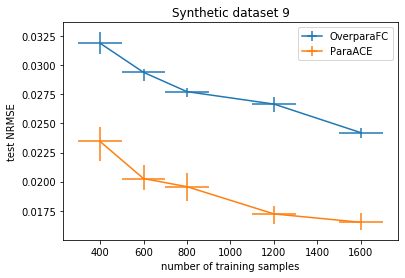

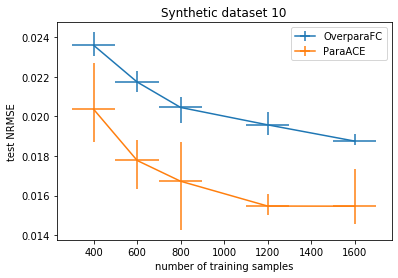

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
directorys=['reduce_plot']  # temp models
for directory in directorys:
    if not os.path.exists(directory):
        os.makedirs(directory)
        
Alldatadf=pd.read_csv('result_sorted.csv') # sort 'dataset index' 

Alldata=Alldatadf[['N_tr','Maskte','FCte']].values
for datasetindex in range(10):
    df=Alldata[datasetindex*25:(datasetindex+1)*25,:]

    MaskLow,MaskUp ,FCLow,FCUp,Maskmean,FCmean,Ntr=[],[],[],[],[],[],[]
    for i in range(5):
        MaskLow.append(np.mean(df[i*5:i*5+5,1])-min(df[i*5:i*5+5,1]))
        MaskUp.append(max(df[i*5:i*5+5,1])-np.mean(df[i*5:i*5+5,1]))
        FCLow.append(np.mean(df[i*5:i*5+5,2])-min(df[i*5:i*5+5,2]))
        FCUp.append(max(df[i*5:i*5+5,2])-np.mean(df[i*5:i*5+5,2]))
        Maskmean.append(np.mean(df[i*5:i*5+5,1]))
        FCmean.append(np.mean(df[i*5:i*5+5,2]))
        Ntr.append(df[i*5,0])
    Maskerr= np.concatenate((np.array(MaskLow).reshape(1,len(MaskLow)),np.array(MaskUp).reshape(1,len(MaskUp))),axis=0)
    FCerr=np.concatenate((np.array(FCLow).reshape(1,len(FCLow)),np.array(FCUp).reshape(1,len(FCUp))),axis=0)
    fig, ax = plt.subplots()
    ax.errorbar(Ntr, FCmean, xerr=100, yerr=FCerr,capthick=4)
    ax.errorbar(Ntr, Maskmean, xerr=100, yerr=Maskerr)
    plt.legend(['OverparaFC','ParaACE'])
    plt.xlabel('number of training samples')
    plt.ylabel('test NRMSE')   
    plt.title("Synthetic dataset "+str(datasetindex+1))      
    plt.savefig('reduce_plot/reduce_data'+str(datasetindex+1)+'.pdf',bbox_inches='tight',dpi=fig.dpi,pad_inches=0.1)


In [23]:
Alldata

array([[1.6000000e+03, 1.7714163e-02, 2.0001704e-02],
       [1.6000000e+03, 1.7418440e-02, 1.9247415e-02],
       [1.6000000e+03, 1.7654609e-02, 1.9547101e-02],
       [1.6000000e+03, 1.7438559e-02, 1.9828292e-02],
       [1.6000000e+03, 1.7326863e-02, 2.0042365e-02],
       [1.2000000e+03, 1.8075403e-02, 2.0368202e-02],
       [1.2000000e+03, 1.8007208e-02, 1.9371735e-02],
       [1.2000000e+03, 1.8449685e-02, 2.0227037e-02],
       [1.2000000e+03, 1.8064486e-02, 1.9844990e-02],
       [1.2000000e+03, 1.8172001e-02, 2.0186597e-02],
       [8.0000000e+02, 1.8646669e-02, 2.0006616e-02],
       [8.0000000e+02, 1.9103670e-02, 2.0458966e-02],
       [8.0000000e+02, 1.9810272e-02, 2.0651745e-02],
       [8.0000000e+02, 1.8765317e-02, 2.0452537e-02],
       [8.0000000e+02, 1.9787649e-02, 2.0631056e-02],
       [6.0000000e+02, 2.0421062e-02, 2.1396523e-02],
       [6.0000000e+02, 2.0459291e-02, 2.1249391e-02],
       [6.0000000e+02, 2.0689208e-02, 2.0776436e-02],
       [6.0000000e+02, 1.997

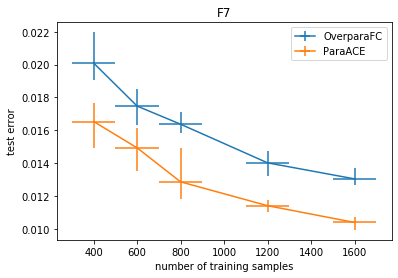

In [36]:


#plt.show()